# Binary Classification

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored
plt.style.use('seaborn')

n_sample = 30
x_train = np.random.normal(0,1,size=(n_sample,1)).astype(np.float32)
y_train = (x_train >= 0).astype(np.float32)

# fig, ax = plt.subplots(figsize=(20,10))
# ax.scatter(x_train, y_train)
# ax.tick_params(labelsize=20)

# print(x_train.dtype)

class Classifier(tf.keras.Model):
    def __init__(self):
        super(Classifier, self).__init__()
        
        self.d1 = tf.keras.layers.Dense(units=1,
                                        activation='sigmoid')
        
    def call(self, x):
        predictions = self.d1(x)
        return predictions

epochs = 10
lr = 0.01
model = Classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

# metrics
loss_metric = tf.keras.metrics.Mean()
acc_metric = tf.keras.metrics.CategoricalAccuracy()


for epoch in range(epochs):
    for x,y in zip(x_train, y_train):
        x = tf.reshape(x,(1,1))
        y = tf.reshape(y,(1,1))
        # forward propagation
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)

        # backpropagation
        gradients = tape.gradient(loss, model.trainable_variables)
        # paramter updating 
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))


        # 내가 구한 loss들을 차곡차곡 쌓아서 나중에 mean을 구해겠다
        loss_metric(loss)
        # 맞았는지 안 맞았는지를 구해줌. 
        acc_metric(y, predictions)


    print(colored('Epoch : ', 'cyan', 'on_white'), epoch + 1)
    template = 'Train Loss : {:.4f}\t Train Accuracy: {:.2f}%'

    ds_loss = loss_metric.result() # 마지막에 평균을 구한 것. 
    ds_acc = acc_metric.result()

    print(template.format(ds_loss, ds_acc*100))

    loss_metric.reset_states()
    acc_metric.reset_states()

<ipython-input-15-89a7492e27fb>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Epoch :  1
Train Loss : 0.5757	 Train Accuracy: 100.00%
Epoch :  2
Train Loss : 0.5639	 Train Accuracy: 100.00%
Epoch :  3
Train Loss : 0.5529	 Train Accuracy: 100.00%
Epoch :  4
Train Loss : 0.5426	 Train Accuracy: 100.00%
Epoch :  5
Train Loss : 0.5330	 Train Accuracy: 100.00%
Epoch :  6
Train Loss : 0.5240	 Train Accuracy: 100.00%
Epoch :  7
Train Loss : 0.5155	 Train Accuracy: 100.00%
Epoch :  8
Train Loss : 0.5075	 Train Accuracy: 100.00%
Epoch :  9
Train Loss : 0.5000	 Train Accuracy: 100.00%
Epoch :  10
Train Loss : 0.4928	 Train Accuracy: 100.00%


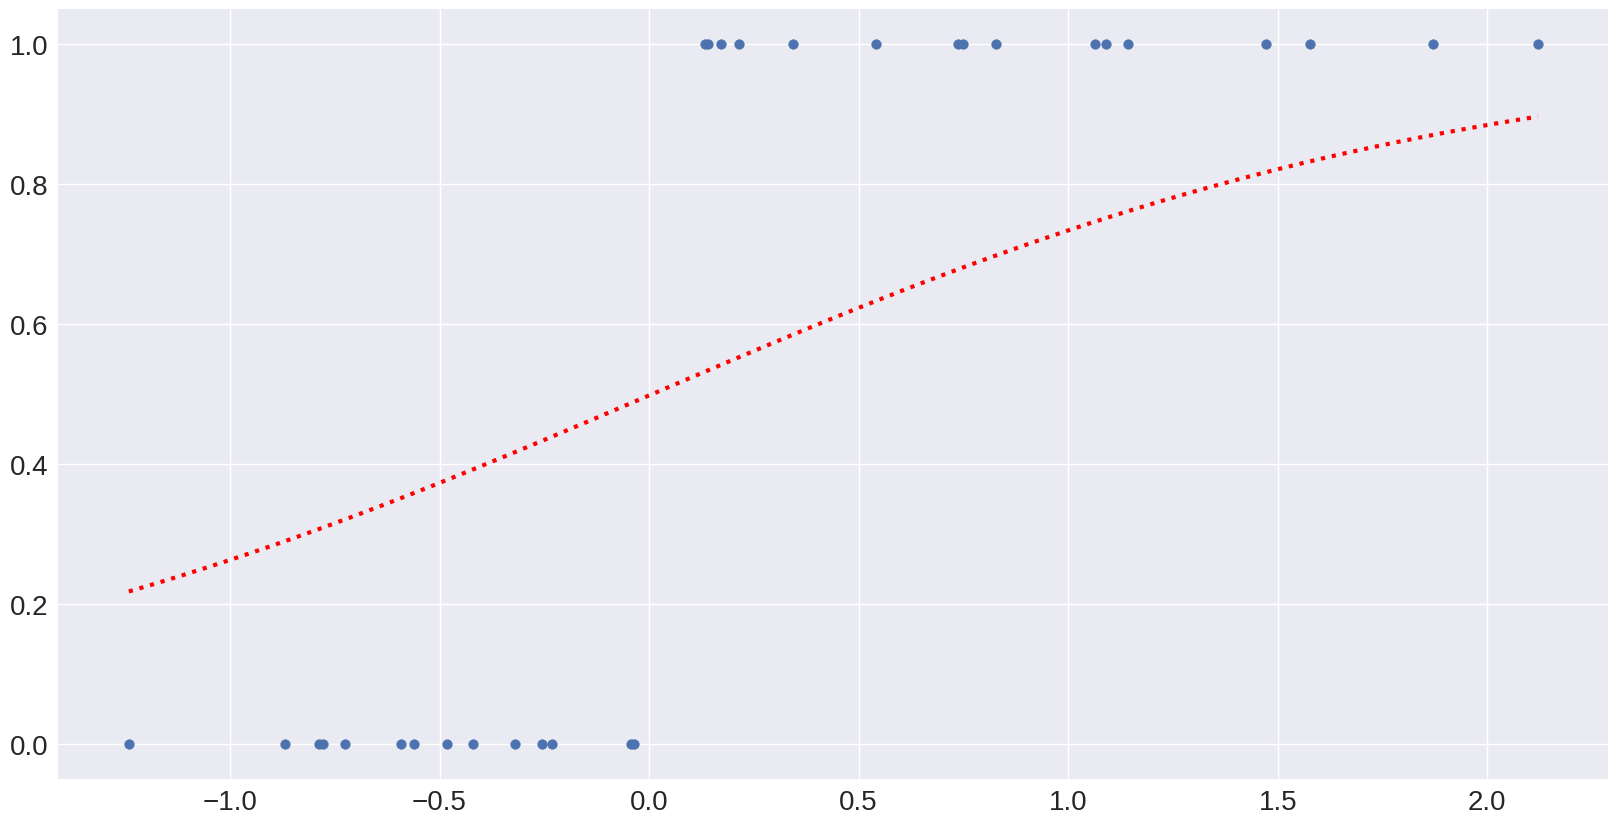

In [20]:
x_min, x_max = x_train.min(), x_train.max()

x_test = np.linspace(x_min, x_max, 300).astype(np.float32).reshape(-1,1)
x_test_tf = tf.constant(x_test)
y_test_tf = model(x_test_tf)

x_result = x_test_tf.numpy()
y_result = y_test_tf.numpy()

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize=20)
ax.plot(x_result, y_result, 'r:', linewidth=3)

# Various Models in the Wild

In [ ]:
# custom layer를 만들어서 뭉치처럼 쓸 수 있음. 
# tf.keras.layers.Layer가 붙으면 custom layer를 만들었다고 볼 수 있음. 
# Model은 fit evaluate predict 들어있지만 layer는 없음, so 그렇게 추천하지 않음

# ==> 마지막은 결국 Model이 되어야 함!!!!

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.kears.layers import Layer, Dense, Flatten
from tensorflow.kears.layers import Conv2D, MaxPooling2D, Activation

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import SparseCategoricalAccuracy

class CustomLayer1(Layer):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def call(self, x):
        return x

model = Sequential()
model.add(CustomLayer1)

# reset_states of Metrics

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

n_train = 1000
train_x = np.random.normal(0,1,size=(n_train,1)).astype(np.float32)
train_x_noise = train_x + 0.2*np.random.normal(0,1,size=(n_train,1))

train_y = (train_x_noise > 0).astype(np.int32)

# fig,ax = plt.subplots(figsize=(10,5))
# ax.scatter(train_x, train_y)
# ax.tick_params(labelsize=15)
# ax.grid()

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

In [32]:
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

# class MyModel(Model):
#     def __init__(self):
#         super(MyModel, self).__init__()
#         self.d1 = Dense(units=2, activation='softmax')

#     def call(self, x):
#         x = self.d1(x)
#         return x


loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

epochs = 10

for epoch in range(epochs):
    for x,y in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_acc(y, predictions)

    print(colored('Epoch : ', 'red', 'on_white'), epoch + 1)
    template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n'
    print(template.format(train_loss.result(), train_acc.result()*100))

    # 마지막에 reset을 해주고 다음 epoch때 처음으로 돌아와서 다시 쌓아줌. 
    # 마지막에 꼭 해줘야 함. 
    train_loss.reset_states()
    train_acc.reset_states()

Epoch :  1
Train Loss: 0.1750	 Train Accuracy: 94.10%

Epoch :  2
Train Loss: 0.1342	 Train Accuracy: 93.70%

Epoch :  3
Train Loss: 0.1327	 Train Accuracy: 94.30%

Epoch :  4
Train Loss: 0.1281	 Train Accuracy: 94.60%

Epoch :  5
Train Loss: 0.1318	 Train Accuracy: 94.00%

Epoch :  6
Train Loss: 0.1309	 Train Accuracy: 94.30%

Epoch :  7
Train Loss: 0.1298	 Train Accuracy: 94.30%

Epoch :  8
Train Loss: 0.1300	 Train Accuracy: 94.20%

Epoch :  9
Train Loss: 0.1282	 Train Accuracy: 94.40%

Epoch :  10
Train Loss: 0.1305	 Train Accuracy: 93.60%



In [31]:
# 누적해서 평균값을 구하고 있음. 
train_loss = Mean()

t1 = tf.constant([1,2,3,4,5,6])
for t in t1:
    train_loss(t)
    print(train_loss.result())

print('\n')

train_loss.reset_states()
t2 = tf.constant([1,2,3,4,5,6]) # 누적한 것이 살아있음. 
for t in t2:
    train_loss(t)
    print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


# Validation, Test and tf.function Decorator

Epoch :  1
Train Loss: 0.1707	 Train Accuracy: 94.50%
Validation Loss: 0.1801	 Validation Accuracy: 92.33%

Epoch :  2
Train Loss: 0.1336	 Train Accuracy: 94.60%
Validation Loss: 0.1857	 Validation Accuracy: 91.67%

Epoch :  3
Train Loss: 0.1310	 Train Accuracy: 94.10%
Validation Loss: 0.1770	 Validation Accuracy: 92.33%

Epoch :  4
Train Loss: 0.1304	 Train Accuracy: 94.40%
Validation Loss: 0.1808	 Validation Accuracy: 92.33%

Epoch :  5
Train Loss: 0.1297	 Train Accuracy: 94.20%
Validation Loss: 0.1801	 Validation Accuracy: 92.33%

Epoch :  6
Train Loss: 0.1269	 Train Accuracy: 94.20%
Validation Loss: 0.1782	 Validation Accuracy: 92.33%

Epoch :  7
Train Loss: 0.1284	 Train Accuracy: 94.30%
Validation Loss: 0.1787	 Validation Accuracy: 92.33%

Epoch :  8
Train Loss: 0.1274	 Train Accuracy: 94.70%
Validation Loss: 0.1827	 Validation Accuracy: 92.00%

Epoch :  9
Train Loss: 0.1261	 Train Accuracy: 94.10%
Validation Loss: 0.1917	 Validation Accuracy: 91.33%

Epoch :  10
Train Loss: 0.12

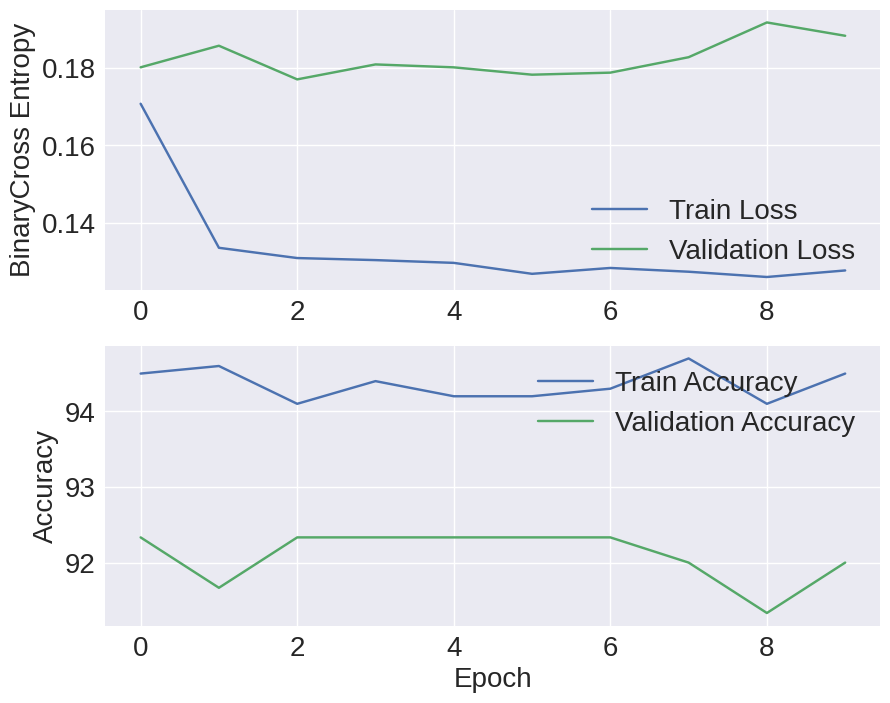

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

# train set
n_train, n_validation, n_test = 1000, 300,300
train_x = np.random.normal(0,1,size=(n_train,1)).astype(np.float32)
train_x_noise = train_x + 0.2*np.random.normal(0,1,size=(n_train,1))
train_y = (train_x_noise > 0).astype(np.int32)

validation_x = np.random.normal(0,1,size=(n_validation,1)).astype(np.float32)
validation_x_noise = validation_x + 0.2*np.random.normal(0,1,size=(n_validation,1))
validation_y = (validation_x_noise > 0).astype(np.int32)

test_x = np.random.normal(0,1,size=(n_test,1)).astype(np.float32)
test_x_noise = test_x + 0.2*np.random.normal(0,1,size=(n_test,1))
test_y = (test_x_noise > 0).astype(np.int32)

# train set split
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

validation_ds = tf.data.Dataset.from_tensor_slices((validation_x, 
                                                    validation_y))
validation_ds = validation_ds.batch(n_validation)

test_ds = tf.data.Dataset.from_tensor_slices((test_x, 
                                              test_y))
test_ds = test_ds.batch(n_test)

# modeling
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

validation_loss = Mean()
validation_acc = SparseCategoricalAccuracy()

test_loss = Mean()
test_acc = SparseCategoricalAccuracy()

epochs = 10

@tf.function
def train_step(x,y):
    global model, loss_object
    global train_loss, train_ac

    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = loss_object(y, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_acc(y, predictions)

@tf.function # 더 빠르게 학습시키고 싶을 때, 최적화 코드 
def validation():
    global validation_ds, model, loss_object
    global validation_loss, validation_acc

    for x,y in validation_ds: # 학습에 관여를 하면 안됨. 
            predictions = model(x)
            loss = loss_object(y, predictions)

            # update 하면 안됨 
            validation_loss(loss)
            validation_acc(y, predictions)

def train_reporter():
    global epoch
    global train_loss, train_acc
    global validation_loss, validation_acc

    print(colored('Epoch : ', 'red', 'on_white'), epoch + 1)
    template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n' + \
            'Validation Loss: {:.4f}\t Validation Accuracy: {:.2f}%\n'
    print(template.format(train_loss.result(), 
                          train_acc.result()*100,
                          validation_loss.result(),
                          validation_acc.result()*100))
    
def metric_resetter():
    global train_loss, train_acc
    global validation_loss, validation_acc

    train_losses.append(train_loss.result())
    validation_losses.append(validation_loss.result())
    train_accs.append(train_acc.result()*100)
    validation_accs.append(validation_acc.result()*100)


    train_loss.reset_states()
    train_acc.reset_states()
    validation_loss.reset_states()
    validation_acc.reset_states()

def final_result_visualization():
    global train_losses, validation_losses
    global train_accs, validation_accs

    fig, axes = plt.subplots(2,1,figsize=(10,8))
    axes[0].plot(train_losses, label='Train Loss')
    axes[0].plot(validation_losses, label='Validation Loss')
    
    axes[1].plot(train_accs, label='Train Accuracy')
    axes[1].plot(validation_accs, label='Validation Accuracy')

    axes[0].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)

    axes[0].set_ylabel('BinaryCross Entropy', fontsize=20)
    axes[1].set_ylabel('Accuracy', fontsize=20)
    axes[1].set_xlabel('Epoch', fontsize=20)

    axes[0].legend(loc='lower right', fontsize=20)
    axes[1].legend(loc='upper right', fontsize=20)


train_losses, validation_losses = list(), list()
train_accs, validation_accs = list(), list()

for epoch in range(epochs):
    for x,y in train_ds:
        train_step(x,y)  # 함수화한 코드 

    # for x,y in validation_ds: # 학습에 관여를 하면 안됨. 
    #     predictions = model(x)
    #     loss = loss_object(y, predictions)

    #     # update 필요 X
    #     validation_loss(loss)
    #     validation_acc(y, predictions)
    validation()

    # print(colored('Epoch : ', 'red', 'on_white'), epoch + 1)
    # template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n' + \
    #         'Validation Loss: {:.4f}\t Validation Accuracy: {:.2f}%\n'
    # print(template.format(train_loss.result(), 
    #                       train_acc.result()*100,
    #                       validation_loss.result(),
    #                       validation_acc.result()*100))
    train_reporter() 
    
    # train_losses.append(train_loss.result())
    # validation_losses.append(validation_loss.result())
    # train_accs.append(train_acc.result()*100)
    # validation_accs.append(validation_acc.result()*100)


    # train_loss.reset_states()
    # train_acc.reset_states()
    # validation_loss.reset_states()
    # validation_acc.reset_states()
    metric_resetter()

for x,y in test_ds:
    predictions = model(x)
    loss = loss_object(y, predictions)
    
    # update 필요 X
    test_loss(loss)
    test_acc(y, predictions)

final_result_visualization()
print(colored('Final result : ', 'cyan', 'on_white'))
template = 'Test Loss: {:.4f}\t Test Accuracy: {:.2f}%\n'
print(template.format(test_loss.result(), 
                      test_acc.result()*100))

# Dataset Load1